# # DSTC2 Data Viewer

Firstly, we will load all data from the training & dev dataset.
Each loaded data is a four tuple: (act_abstract, act_natural, best_asr, trans),
corresponding to: system's abstracted action, system's reply in natural languge, the best asr hypothesis of the user's utterance, and the labeled user utterance.

This may take some time (< 1 min on my laptop).

In [1]:
%matplotlib inline

from scripts.dataset_walker import *

dataroot_path = "data"
dataset_train = dataset_walker("dstc2_train", dataroot=dataroot_path, \
                               labels=True)
dataset_dev = dataset_walker("dstc2_dev", dataroot=dataroot_path, \
                               labels=True)

train_dial = []
dev_dial = []

act_rec = []

dial_list = []

def dialog_acts_to_str(acts):
    global act_rec
    res = ""
    for act in acts:
        act_rec.append(act["act"])
        res = res + act["act"] + "("
        if len(act["slots"]) > 0:
            res = res + act["slots"][0][0] + ", " + act["slots"][0][1]
            for slot in act["slots"][1:]:
                res = res + ", " + slot[0] + slot[1]
        res = res + ")  "
    return res

def acts_to_set(acts):
    res = []
    for act in acts:
        s = act["act"]
        if len(act["slots"]) > 0:
            s = s + "_" + act["slots"][0][0]
        res.append(s)
    return set(res)

print "Loading data ... This may take some time (< 1 min on my laptop) ..."

for call in dataset_train :
    turn_list = []
    for _turn, _label in call :
        act_abstract = dialog_acts_to_str(_turn["output"]["dialog-acts"])
        act_natural = _turn["output"]["transcript"]
        best_asr = _turn["input"]["live"]["asr-hyps"][0]["asr-hyp"]
        trans = _label["transcription"]
        train_dial.append((act_abstract, act_natural, best_asr, trans))
        turn_list.append(acts_to_set(_turn["output"]["dialog-acts"]))
    dial_list.append(turn_list)

for call in dataset_dev :
    turn_list = []
    for _turn, _label in call :
        act_abstract = dialog_acts_to_str(_turn["output"]["dialog-acts"])
        act_natural = _turn["output"]["transcript"]
        best_asr = _turn["input"]["live"]["asr-hyps"][0]["asr-hyp"]
        trans = _label["transcription"]
        dev_dial.append((act_abstract, act_natural, best_asr, trans))
        turn_list.append(acts_to_set(_turn["output"]["dialog-acts"]))
    dial_list.append(turn_list)
        
print "All data loaded."
print "There are %d dialogs in the training data, and %d in the dev data." % (len(train_dial), len(dev_dial))

Loading data ... This may take some time (< 1 min on my laptop) ...
All data loaded.
There are 11677 dialogs in the training data, and 3934 in the dev data.


Next let's see the dialog actions (by the system), and the corresponding natural language.

Explain:
Each natural language generated by the system, may correspond to a set of different (abstracted) dialog actions.
For example, the sentence "pizza hut city centre is a nice restaurant in the centre of town serving italian food" is generated by 4 dialog actions: 
{offer(name, pizza hut city center), inform(food, italian), inform(pricerange, cheap), inform(area, center)}

We randomly shuffle the data, and print the first 5 from traing/dev.

In [2]:
import random

random.shuffle(train_dial)
random.shuffle(dev_dial)

print "5 examples from train data:"
for k in range(5):
    print train_dial[k][0], ":\n  ", train_dial[k][1]
    
print
print "5 examples from dev data:"
for k in range(5):
    print dev_dial[k][0], ":\n  ", dev_dial[k][1]

5 examples from train data:
request(slot, food)   :
   What kind of food would you like?
welcomemsg()   :
   Hello , welcome to the Cambridge restaurant system? You can ask for restaurants by area , price range or food type . How may I help you?
welcomemsg()   :
   Hello , welcome to the Cambridge restaurant system? You can ask for restaurants by area , price range or food type . How may I help you?
offer(name, restaurant alimentum)  inform(pricerange, moderate)  inform(area, south)   :
   restaurant alimentum is a nice place in the south of town and the prices are moderate
canthelp(food, basque)   :
   I'm sorry but there is no restaurant serving basque food

5 examples from dev data:
welcomemsg()   :
   Hello , welcome to the Cambridge restaurant system? You can ask for restaurants by area , price range or food type . How may I help you?
canthelp(food, spanish, areaeast)   :
   I'm sorry but there is no spanish restaurant in the east of town
offer(name, restaurant alimentum)  inform(

The followings are some conversations between the system and the user (in natural language).

In [3]:
for k in range(10):
    print "System:", train_dial[k][1]
    print "User:", train_dial[k][3]
    print

System: What kind of food would you like?
User: anything

System: Hello , welcome to the Cambridge restaurant system? You can ask for restaurants by area , price range or food type . How may I help you?
User: looking for an expensive restaurant that serves indonesian food

System: Hello , welcome to the Cambridge restaurant system? You can ask for restaurants by area , price range or food type . How may I help you?
User: looking for a moderately priced restaurant in the north of town

System: restaurant alimentum is a nice place in the south of town and the prices are moderate
User: phone number

System: I'm sorry but there is no restaurant serving basque food
User: how about asian oriental

System: The phone number of la margherita is 01223 315232 .
User: thank you good bye

System: What kind of food would you like?
User: basque

System: the nirala is a nice restaurant in the north of town serving indian food
User: what is the address

System: Hello , welcome to the Cambridge restaura

The followings are some statistics of interests.

Total number of system actions in train/dev: 26302
Unique action type: 12


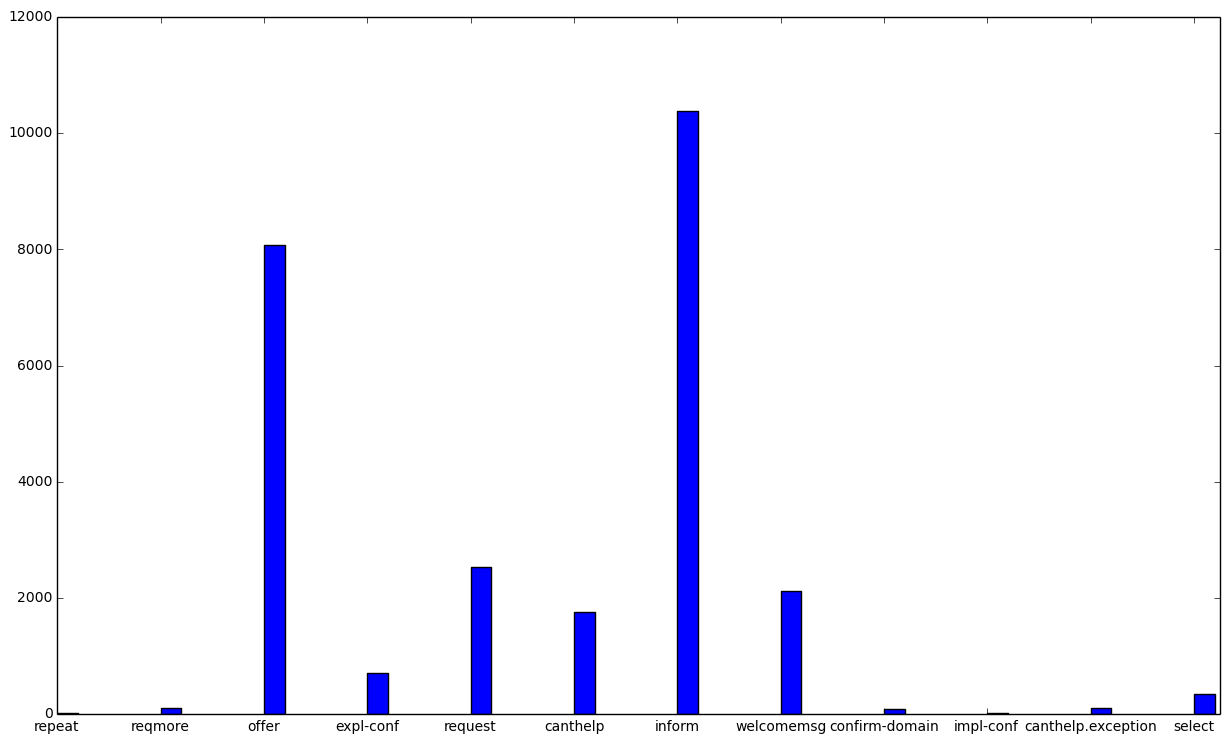

In [13]:
import numpy as np

print "About sys actions"
print "Total number of system actions in train/dev:", len(act_rec)
uni_act = list(set(act_rec))
print "Unique action type:", len(uni_act)

y_pos = np.arange(len(uni_act)) * 4

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
plt.bar(y_pos, [act_rec.count(a) for a in uni_act])
plt.xticks(y_pos, uni_act)
plt.show()

print "About user actions"

Information about dialogs (each dialog is a list of turns, and each turn is an unorder set of system actions without considering the last argument).

In [10]:
uni_dial_list = []

for dial in dial_list:
    if dial not in uni_dial_list:
        uni_dial_list.append(dial)

print "Num of all dialog sequences:", len(dial_list)
print "Num of unique dialog sequences:", len(uni_dial_list)
print

print "Examples of dialogs:"
for k in range(5):
    print "Dialog %d:" % k
    for (tk, turn) in enumerate(uni_dial_list[k]):
        print "Turn %d: %s" % (tk, turn)
    print 

Num of all dialog sequences: 2118
Num of unique dialog sequences: 1642

Examples of dialogs:
Dialog 0:
Turn 0: set([u'welcomemsg'])
Turn 1: set([u'request_slot'])
Turn 2: set([u'canthelp_pricerange'])
Turn 3: set([u'inform_food', u'offer_name', u'inform_pricerange'])
Turn 4: set([u'reqmore'])
Turn 5: set([u'offer_name', u'inform_addr'])
Turn 6: set([u'offer_name', u'inform_phone'])

Dialog 1:
Turn 0: set([u'welcomemsg'])
Turn 1: set([u'request_slot'])
Turn 2: set([u'request_slot'])
Turn 3: set([u'request_slot'])
Turn 4: set([u'request_slot'])
Turn 5: set([u'request_slot'])
Turn 6: set([u'offer_name', u'inform_pricerange', u'inform_area'])
Turn 7: set([u'offer_name', u'inform_pricerange', u'inform_area'])
Turn 8: set([u'offer_name', u'inform_phone'])
Turn 9: set([u'offer_name', u'inform_pricerange'])
Turn 10: set([u'offer_name', u'inform_phone'])

Dialog 2:
Turn 0: set([u'welcomemsg'])
Turn 1: set([u'request_slot'])
Turn 2: set([u'expl-conf_pricerange'])
Turn 3: set([u'request_slot'])
T